## @Restaurant-Review-Analysis-KNN

### Importing Libraries and Files  ¶

In [106]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score
%matplotlib inline
sns.set()

In [107]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t',quoting = 3)
print(dataset)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [108]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Cleaning the dataset  ¶

In [109]:
corpus = []
for i in range (0, 1000):
    # Removing unnecessary punctuations and numbers except letters and replacing removed words with space.
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    # Converting review to lowercase
    review = review.lower()
    # Converting review to list(of strings)
    review = review.split()
    ps = PorterStemmer()
    words_to_stem = ['go','gone','going','giving','gave','give','would','will','can','could','can\'t','having','have','have been','has been','had']
    for words in words_to_stem:
        print(words+": "+ps.stem(words))
    words = stopwords.words('english')
    words.remove('not')
    words.remove('but')
    words.remove('is')
    words.remove('the')
    review = [ps.stem(word) for word in review if not word in set(words)]
    review = ' '.join(review)
    corpus.append(review)

go: go
gone: gone
going: go
giving: give
gave: gave
give: give
would: would
will: will
can: can
could: could
can't: can't
having: have
have: have
have been: have been
has been: has been
had: had
go: go
gone: gone
going: go
giving: give
gave: gave
give: give
would: would
will: will
can: can
could: could
can't: can't
having: have
have: have
have been: have been
has been: has been
had: had
go: go
gone: gone
going: go
giving: give
gave: gave
give: give
would: would
will: will
can: can
could: could
can't: can't
having: have
have: have
have been: have been
has been: has been
had: had
go: go
gone: gone
going: go
giving: give
gave: gave
give: give
would: would
will: will
can: can
could: could
can't: can't
having: have
have: have
have been: have been
has been: has been
had: had
go: go
gone: gone
going: go
giving: give
gave: gave
give: give
would: would
will: will
can: can
could: could
can't: can't
having: have
have: have
have been: have been
has been: has been
had: had
go: go
gone: gone
going: 

In [110]:
print(corpus)

['wow love place', 'crust is not good', 'not tasti the textur nasti', 'stop the late may bank holiday rick steve recommend love', 'the select the menu great the price', 'get angri want damn pho', 'honeslti tast fresh', 'the potato like rubber could tell made ahead time kept warmer', 'the fri great', 'great touch', 'servic prompt', 'would not go back', 'the cashier care ever say still end wayyy overpr', 'tri the cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place is not worth time let alon vega', 'not like', 'the burritto blah', 'the food amaz', 'servic is also cute', 'could care less the interior is beauti', 'perform', 'right the red velvet cake ohhh stuff is good', 'never brought salad ask', 'hole the wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'the worst the salmon sashimi', 'also combo lik

In [111]:
len(corpus)

1000

### Creating Bag of Words  ¶

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).todense()
y = dataset.iloc[:,1].values

In [113]:
# Split dataset into 'test' and 'train' dataset
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.025, random_state = 25)

### Naive Bayes Classifier  ¶

In [114]:
classifier = GaussianNB()       # Naive Bayes Classifier
classifier.fit(X_train, y_train)

GaussianNB()

In [115]:
# Support Vector Machine
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)

In [116]:
# Actual and Predicted value comparision
results = pd.DataFrame({
    'Actual': np.array(y_test).flatten(),
    'Predicted': np.array(y_pred).flatten(),
})
results[1:20]

,Actual,Predicted
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
10,0,0


Accuracy Score:  0.96


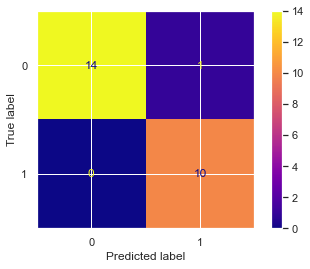

In [117]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(clf,X_test , y_test, cmap = 'plasma')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: ',accuracy)

### K-Nearest Neighbor(KNN) Classifier ¶

In [118]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [119]:
# Support Vector Machine
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)

Accuracy Score:  0.96


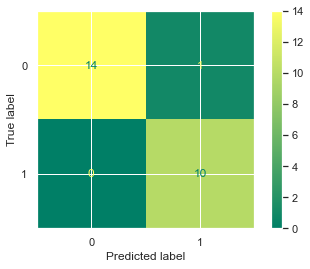

In [120]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(clf,X_test , y_test, cmap = 'summer')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: ',accuracy)